In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv('clean.csv')

In [4]:
#Data Cleaning
df = df[df['Available TEU'] != 0] 

df.loc[(df['Terminal'] == 'BirminghamL') , 'Terminal'] = 'Birmingham'
df.loc[(df['Terminal'] == 'LiverpoolL') , 'Terminal'] = 'Liverpool'
df.loc[(df['Terminal'] == 'ManchesterL') , 'Terminal'] = 'Manchester'

df.loc[(df['Head Code'] == '$l40') , 'Head Code'] = '4L40'

In [5]:
#Initial Feature Engineering
df['Buy Back TEU'] = df['Buy Back - 20ft'] + (df['Buy Back - 40ft'] *2)
df['Used TEU'] = df['Used TEU'] - df['Buy Back TEU']
df['Unused TEU'] = df['Available TEU'] - df['Used TEU'] - df['Buy Back TEU']
df.loc[df['Type'] == "40'" , 'Available 40ft'] = df['Available TEU']/2
df.loc[df['Type'] == "HC" , 'Available 40ft'] = df['Available TEU'] / 2
df.loc[df['Type'] == "20'" , 'Available 20ft'] = df['Available TEU']
df['Used 40 ft'] = df['Laden Containers - 40ft'] + df['Empty Containers - 40ft'] + df['Laden Containers - HC'] \
+ df['Empty Containers - HC'] + df['Laden Containers - 45ft'] + df['Empty Containers - 45ft']
df['Used 20 ft'] = df['Laden Containers - 20ft'] + df['Empty Containers - 20ft']
df['Unused 40 ft'] = df['Available 40ft'] - df['Used 40 ft'] - df['Buy Back - 40ft']
df['Unused 20 ft'] = df['Available 20ft'] - df['Used 20 ft'] - df['Buy Back - 20ft']

# Group 5

In [6]:
data= df.groupby(['Port', 'Terminal', 'Head Code', 'Week', 'Day', 'Direction']).agg({'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum'}).reset_index()

In [7]:
data['No of Services'] = 1
data['TEU Utilisation (before Buy Back)'] = data['Used TEU'] / data['Available TEU']
data['TEU Utilisation (after buy back)'] = (data['Used TEU'] + data['Buy Back - 20ft'] + \
                                          data['Buy Back - 40ft']) / data['Available TEU']
data['40 ft Utilisation (before buy back)'] = data['Used 40 ft'] / data['Available 40ft']
data['20 ft Utilisation (before buy back)'] = data['Used 20 ft'] / data['Available 20ft']
data['40 ft Utilisation (after buy back)'] = (data['Used 40 ft'] + data['Buy Back - 40ft']) / data['Available 40ft']
data['20 ft Utilisation (after buy back)'] = (data['Used 20 ft'] + data['Buy Back - 20ft']) / data['Available 20ft']
data['Average Contract TEU'] = data['Available TEU'] / data['No of Services']
data['Average Used TEU'] = data['Used TEU'] / data['No of Services']
data['Average Buy-back TEU'] = data['Buy Back TEU'] / data['No of Services']
data['Average Unused TEU'] = data['Unused TEU'] / data['No of Services']
data['Average Contract 40ft boxes'] = data['Available 40ft'] / data['No of Services']
data['Average used 40ft boxes'] = data['Used 40 ft'] / data['No of Services']
data['Average buy-back 40ft boxes'] = data['Buy Back - 40ft'] / data['No of Services']
data['Average unused 40ft boxes'] = data['Unused 40 ft'] / data['No of Services']
data['Average Contract 20ft boxes'] = data['Available 20ft'] / data['No of Services']
data['Average used 20ft boxes'] = data['Used 20 ft'] / data['No of Services']
data['Average buy-back 20ft boxes'] = data['Buy Back - 20ft'] / data['No of Services']
data['Average unused 20ft boxes'] = data['Unused 20 ft'] / data['No of Services']

data


,Port,Terminal,Head Code,Week,Day,Direction,Available TEU,Used TEU,Buy Back TEU,Unused TEU,...,Average Buy-back TEU,Average Unused TEU,Average Contract 40ft boxes,Average used 40ft boxes,Average buy-back 40ft boxes,Average unused 40ft boxes,Average Contract 20ft boxes,Average used 20ft boxes,Average buy-back 20ft boxes,Average unused 20ft boxes
0,Felixstowe,Birmingham,4L58,1,Thursday,Export,37,34,0,3,...,0.0,3.0,15.0,15.0,0.0,0.0,7.0,4.0,0.0,3.0
1,Felixstowe,Birmingham,4L58,1,Tuesday,Export,37,33,0,4,...,0.0,4.0,15.0,15.0,0.0,0.0,7.0,3.0,0.0,4.0
2,Felixstowe,Birmingham,4L58,1,Wednesday,Export,37,33,0,4,...,0.0,4.0,15.0,15.0,0.0,0.0,7.0,3.0,0.0,4.0
3,Felixstowe,Birmingham,4L58,2,Monday,Export,37,37,0,0,...,0.0,0.0,15.0,15.0,0.0,0.0,7.0,7.0,0.0,0.0
4,Felixstowe,Birmingham,4L58,2,Thursday,Export,37,37,0,0,...,0.0,0.0,15.0,14.0,0.0,1.0,7.0,9.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8132,London Gateway,Manchester,4M60,46,Friday,Import,12,3,9,0,...,9.0,0.0,4.0,1.0,3.0,0.0,4.0,1.0,3.0,0.0
8133,London Gateway,Manchester,4M60,46,Monday,Import,12,10,0,2,...,0.0,2.0,4.0,4.0,0.0,0.0,4.0,2.0,0.0,2.0
8134,London Gateway,Manchester,4M60,46,Thursday,Import,12,5,4,3,...,4.0,3.0,4.0,2.0,2.0,0.0,4.0,1.0,0.0,3.0
8135,London Gateway,Manchester,4M60,46,Tuesday,Import,12,9,0,3,...,0.0,3.0,4.0,4.0,0.0,0.0,4.0,1.0,0.0,3.0


# Group 1

In [8]:
group1= data.groupby(['Port', 'Terminal']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum'})

In [9]:
group1['TEU Utilisation (before Buy Back)'] = group1['Used TEU'] / group1['Available TEU']
group1['TEU Utilisation (after buy back)'] = (group1['Used TEU'] + group1['Buy Back - 20ft'] + \
                                          group1['Buy Back - 40ft']) / group1['Available TEU']
group1['40 ft Utilisation (before buy back)'] = group1['Used 40 ft'] / group1['Available 40ft']
group1['20 ft Utilisation (before buy back)'] = group1['Used 20 ft'] / group1['Available 20ft']
group1['40 ft Utilisation (after buy back)'] = (group1['Used 40 ft'] + group1['Buy Back - 40ft']) / group1['Available 40ft']
group1['20 ft Utilisation (after buy back)'] = (group1['Used 20 ft'] + group1['Buy Back - 20ft']) / group1['Available 20ft']
group1['Average Contract TEU'] = group1['Available TEU'] / group1['No of Services']
group1['Average Used TEU'] = group1['Used TEU'] / group1['No of Services']
group1['Average Buy-back TEU'] = group1['Buy Back TEU'] / group1['No of Services']
group1['Average Unused TEU'] = group1['Unused TEU'] / group1['No of Services']
group1['Average Contract 40ft boxes'] = group1['Available 40ft'] / group1['No of Services']
group1['Average used 40ft boxes'] = group1['Used 40 ft'] / group1['No of Services']
group1['Average buy-back 40ft boxes'] = group1['Buy Back - 40ft'] / group1['No of Services']
group1['Average unused 40ft boxes'] = group1['Unused 40 ft'] / group1['No of Services']
group1['Average Contract 20ft boxes'] = group1['Available 20ft'] / group1['No of Services']
group1['Average used 20ft boxes'] = group1['Used 20 ft'] / group1['No of Services']
group1['Average buy-back 20ft boxes'] = group1['Buy Back - 20ft'] / group1['No of Services']
group1['Average unused 20ft boxes'] = group1['Unused 20 ft'] / group1['No of Services']

group1

No of Services  Available TEU  Used TEU  \
Port           Terminal                                              
Felixstowe     Birmingham            1165          45903     34349   
               Cardiff                390          19788     13002   
               Cleveland              390          16650      8870   
               Ditton                 777          52383     35263   
               Doncaster              389          11394      8658   
               EMG                    349           3490      2693   
               Leeds                  777          10497      8608   
               Liverpool              388           3706      2696   
               Manchester            1554          38448     23543   
               Tinsley                388          22096     15942   
London Gateway Birmingham             392           6142      4663   
               Leeds                  394           4340      2936   
               Liverpool              392           2873      2110   
               Manchester             392           6906      4652   

                           Buy Back TEU  Unused TEU  Available 40ft  \
Port           Terminal                                               
Felixstowe     Birmingham          6322        5232         19578.0   
               Cardiff             3703        3083          8299.0   
               Cleveland           3273        4507          7314.0   
               Ditton              8076        9044         21446.0   
               Doncaster           1276        1460          5103.0   
               EMG                  266         531          1745.0   
               Leeds               1144         745          4844.0   
               Liverpool            234         776          1635.0   
               Manchester          5103        9802         16590.0   
               Tinsley             4002        2152          9453.0   
London Gateway Birmingham           222        1257          1576.0   
               Leeds                465         939          1396.0   
               Liverpool            272         491           905.0   
               Manchester           564        1690          2439.0   

                           Used 40 ft  Buy Back - 40ft  Unused 40 ft  \
Port           Terminal                                                
Felixstowe     Birmingham       13918             2701        2959.0   
               Cardiff           5633             1492        1174.0   
               Cleveland         3901             1348        2065.0   
               Ditton           14872             3339        3235.0   
               Doncaster         3686              592         825.0   
               EMG               1260              133         352.0   
               Leeds             3600              552         692.0   
               Liverpool         1112               90         433.0   
               Manchester       10535             2213        3843.0   
               Tinsley           6940             1658         864.0   
London Gateway Birmingham        1305               45         226.0   
               Leeds             1072              109         215.0   
               Liverpool          747               47         111.0   
               Manchester        1925              146         368.0   

                           Available 20ft  ...  Average Buy-back TEU  \
Port           Terminal                    ...                         
Felixstowe     Birmingham          6747.0  ...              5.426609   
               Cardiff             3190.0  ...              9.494872   
               Cleveland           2022.0  ...              8.392308   
               Ditton              9491.0  ...             10.393822   
               Doncaster           1188.0  ...              3.280206   
               EMG                    0.0  ...              0.762178   
               Leeds                809.

# Group 2

In [10]:
group2= data.groupby(['Port', 'Terminal', 'Head Code']).agg({'No of Services': 'sum','Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',})

In [11]:
group2['TEU Utilisation (before Buy Back)'] = group2['Used TEU'] / group2['Available TEU']
group2['TEU Utilisation (after buy back)'] = (group2['Used TEU'] + group2['Buy Back - 20ft'] + \
                                          group2['Buy Back - 40ft']) / group2['Available TEU']
group2['40 ft Utilisation (before buy back)'] = group2['Used 40 ft'] / group2['Available 40ft']
group2['20 ft Utilisation (before buy back)'] = group2['Used 20 ft'] / group2['Available 20ft']
group2['40 ft Utilisation (after buy back)'] = (group2['Used 40 ft'] + group2['Buy Back - 40ft']) / group2['Available 40ft']
group2['20 ft Utilisation (after buy back)'] = (group2['Used 20 ft'] + group2['Buy Back - 20ft']) / group2['Available 20ft']
group2['Average Contract TEU'] = group2['Available TEU'] / group2['No of Services']
group2['Average Used TEU'] = group2['Used TEU'] / group2['No of Services']
group2['Average Buy-back TEU'] = group2['Buy Back TEU'] / group2['No of Services']
group2['Average Unused TEU'] = group2['Unused TEU'] / group2['No of Services']
group2['Average Contract 40ft boxes'] = group2['Available 40ft'] / group2['No of Services']
group2['Average used 40ft boxes'] = group2['Used 40 ft'] / group2['No of Services']
group2['Average buy-back 40ft boxes'] = group2['Buy Back - 40ft'] / group2['No of Services']
group2['Average unused 40ft boxes'] = group2['Unused 40 ft'] / group2['No of Services']
group2['Average Contract 20ft boxes'] = group2['Available 20ft'] / group2['No of Services']
group2['Average used 20ft boxes'] = group2['Used 20 ft'] / group2['No of Services']
group2['Average buy-back 20ft boxes'] = group2['Buy Back - 20ft'] / group2['No of Services']
group2['Average unused 20ft boxes'] = group2['Unused 20 ft'] / group2['No of Services']

group2

No of Services  Available TEU  Used TEU  \
Port           Terminal   Head Code                                            
Felixstowe     Birmingham 4L58                  156           5814      5129   
                          4L69                  193           8406      6886   
                          4L77                   38           1457      1242   
                          4L99                  195           7215      4035   
                          4M92                  194           8473      6630   
                          4M93                  194           7315      4563   
                          4M94                  157           5809      4726   
                          5M81                   38           1414      1138   
               Cardiff    4L36                  195           9859      6681   
                          5V36                  195           9929      6321   
               Cleveland  4E64                  195           8361      3970   
                          4L78                  195           8289      4900   
               Ditton     4K40                  155          10384      6763   
                          4L92                  195          13048      9971   
                          4M89                  194          13047      8187   
                          6L41                   38           2736      1751   
                          6M88                  195          13168      8591   
               Doncaster  4E56                  195           5931      3968   
                          4L40                  194           5463      4690   
               EMG        4L10                  195           1950      1546   
                          5M64                   44            440       334   
                          5M86                  110           1100       813   
               Leeds      4E23                  156           2067      1612   
                          4E24                   38            496       350   
                          4E59                  195           2653      1898   
                          4L83                  194           2676      2362   
                          4L87                  194           2605      2386   
               Liverpool  4M42                  194           1900      1407   
                          6L95                  194           1806      1289   
               Manchester 4L41                  155           5625      2672   
                          4L86                  157           4629      3604   
                          4L90                   38           1338       733   
                          4L91                  193           2376      1984   
                          4L96                   38           1155       903   
                          4L97                  193           4068      2174   
                          4M53                  194           4020      2717   
                          4M63                  195           2340      1516   
                          4M81                  196           5809      2913   
                          4M87                  195           7088      4327   
               Tinsley    4E82                  194          11050      7717   
                          4L09                   38           2143      1426   
                          4L85                  156           8903      6799   
London Gateway Birmingham 4L46                  196           3057      2442   
                          4M43                  196           3085      2221   
               Leeds      5E24                  197           2202      1430   
                          5L88                  197           2138      1506   
               Liverpool  4L52                  196           1800      1529   
                          4M56                  196           1073       581   
               Manchester 4L26       

# Group 3

In [12]:
group3= data.groupby(['Port', 'Terminal', 'Head Code', 'Direction']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',})

In [13]:
group3['TEU Utilisation (before Buy Back)'] = group3['Used TEU'] / group3['Available TEU']
group3['TEU Utilisation (after buy back)'] = (group3['Used TEU'] + group3['Buy Back - 20ft'] + \
                                          group3['Buy Back - 40ft']) / group3['Available TEU']
group3['40 ft Utilisation (before buy back)'] = group3['Used 40 ft'] / group3['Available 40ft']
group3['20 ft Utilisation (before buy back)'] = group3['Used 20 ft'] / group3['Available 20ft']
group3['40 ft Utilisation (after buy back)'] = (group3['Used 40 ft'] + group3['Buy Back - 40ft']) / group3['Available 40ft']
group3['20 ft Utilisation (after buy back)'] = (group3['Used 20 ft'] + group3['Buy Back - 20ft']) / group3['Available 20ft']
group3['Average Contract TEU'] = group3['Available TEU'] / group3['No of Services']
group3['Average Used TEU'] = group3['Used TEU'] / group3['No of Services']
group3['Average Buy-back TEU'] = group3['Buy Back TEU'] / group3['No of Services']
group3['Average Unused TEU'] = group3['Unused TEU'] / group3['No of Services']
group3['Average Contract 40ft boxes'] = group3['Available 40ft'] / group3['No of Services']
group3['Average used 40ft boxes'] = group3['Used 40 ft'] / group3['No of Services']
group3['Average buy-back 40ft boxes'] = group3['Buy Back - 40ft'] / group3['No of Services']
group3['Average unused 40ft boxes'] = group3['Unused 40 ft'] / group3['No of Services']
group3['Average Contract 20ft boxes'] = group3['Available 20ft'] / group3['No of Services']
group3['Average used 20ft boxes'] = group3['Used 20 ft'] / group3['No of Services']
group3['Average buy-back 20ft boxes'] = group3['Buy Back - 20ft'] / group3['No of Services']
group3['Average unused 20ft boxes'] = group3['Unused 20 ft'] / group3['No of Services']

group3

No of Services  Available TEU  \
Port           Terminal   Head Code Direction                                  
Felixstowe     Birmingham 4L58      Export                156           5814   
                          4L69      Export                193           8406   
                          4L77      Export                 38           1457   
                          4L99      Export                195           7215   
                          4M92      Import                194           8473   
                          4M93      Import                194           7315   
                          4M94      Import                157           5809   
                          5M81      Import                 38           1414   
               Cardiff    4L36      Export                195           9859   
                          5V36      Import                195           9929   
               Cleveland  4E64      Import                195           8361   
                          4L78      Export                195           8289   
               Ditton     4K40      Export                155          10384   
                          4L92      Export                195          13048   
                          4M89      Import                194          13047   
                          6L41      Export                 38           2736   
                          6M88      Import                195          13168   
               Doncaster  4E56      Import                195           5931   
                          4L40      Export                194           5463   
               EMG        4L10      Export                195           1950   
                          5M64      Import                 44            440   
                          5M86      Import                110           1100   
               Leeds      4E23      Import                156           2067   
                          4E24      Import                 38            496   
                          4E59      Import                195           2653   
                          4L83      Export                194           2676   
                          4L87      Export                194           2605   
               Liverpool  4M42      Import                194           1900   
                          6L95      Export                194           1806   
               Manchester 4L41      Export                155           5625   
                          4L86      Export                157           4629   
                          4L90      Export                 38           1338   
                          4L91      Export                193           2376   
                          4L96      Export                 38           1155   
                          4L97      Export                193           4068   
                          4M53      Import                194           4020   
                          4M63      Import                195           2340   
                          4M81      Import                196           5809   
                          4M87      Import                195           7088   
               Tinsley    4E82      Import                194          11050   
                          4L09      Export                 38           2143   
                          4L85      Export                156           8903   
London Gateway Birmingham 4L46      Export                196           3057   
                          4M43      Import                196           3085   
               Leeds      5E24      Import                197           2202   
                          5L88      Export                197           2138   
               Liverpool  4L52      Export                196           1800   
                          4M56      Import                196           1073   
               Manchester 4L26      Export     

# Group 4

In [14]:
group4= data.groupby(['Port', 'Terminal', 'Head Code', 'Day', 'Direction']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',})

In [15]:
group4['TEU Utilisation (before Buy Back)'] = group4['Used TEU'] / group4['Available TEU']
group4['TEU Utilisation (after buy back)'] = (group4['Used TEU'] + group4['Buy Back - 20ft'] + \
                                          group4['Buy Back - 40ft']) / group4['Available TEU']
group4['40 ft Utilisation (before buy back)'] = group4['Used 40 ft'] / group4['Available 40ft']
group4['20 ft Utilisation (before buy back)'] = group4['Used 20 ft'] / group4['Available 20ft']
group4['40 ft Utilisation (after buy back)'] = (group4['Used 40 ft'] + group4['Buy Back - 40ft']) / group4['Available 40ft']
group4['20 ft Utilisation (after buy back)'] = (group4['Used 20 ft'] + group4['Buy Back - 20ft']) / group4['Available 20ft']
group4['Average Contract TEU'] = group4['Available TEU'] / group4['No of Services']
group4['Average Used TEU'] = group4['Used TEU'] / group4['No of Services']
group4['Average Buy-back TEU'] = group4['Buy Back TEU'] / group4['No of Services']
group4['Average Unused TEU'] = group4['Unused TEU'] / group4['No of Services']
group4['Average Contract 40ft boxes'] = group4['Available 40ft'] / group4['No of Services']
group4['Average used 40ft boxes'] = group4['Used 40 ft'] / group4['No of Services']
group4['Average buy-back 40ft boxes'] = group4['Buy Back - 40ft'] / group4['No of Services']
group4['Average unused 40ft boxes'] = group4['Unused 40 ft'] / group4['No of Services']
group4['Average Contract 20ft boxes'] = group4['Available 20ft'] / group4['No of Services']
group4['Average used 20ft boxes'] = group4['Used 20 ft'] / group4['No of Services']
group4['Average buy-back 20ft boxes'] = group4['Buy Back - 20ft'] / group4['No of Services']
group4['Average unused 20ft boxes'] = group4['Unused 20 ft'] / group4['No of Services']

group4

No of Services  \
Port           Terminal   Head Code Day       Direction                   
Felixstowe     Birmingham 4L58      Monday    Export                 36   
                                    Thursday  Export                 38   
                                    Tuesday   Export                 41   
                                    Wednesday Export                 41   
                          4L69      Friday    Export                 38   
...                                                                 ...   
London Gateway Manchester 4M60      Friday    Import                 40   
                                    Monday    Import                 35   
                                    Thursday  Import                 39   
                                    Tuesday   Import                 41   
                                    Wednesday Import                 41   

                                                         Available TEU  \
Port           Terminal   Head Code Day       Direction                  
Felixstowe     Birmingham 4L58      Monday    Export              1346   
                                    Thursday  Export              1406   
                                    Tuesday   Export              1531   
                                    Wednesday Export              1531   
                          4L69      Friday    Export              1691   
...                                                                ...   
London Gateway Manchester 4M60      Friday    Import               628   
                                    Monday    Import               524   
                                    Thursday  Import               576   
                                    Tuesday   Import               600   
                                    Wednesday Import               608   

                                                         Used TEU  \
Port           Terminal   Head Code Day       Direction             
Felixstowe     Birmingham 4L58      Monday    Export         1180   
                                    Thursday  Export         1266   
                                    Tuesday   Export         1338   
                                    Wednesday Export         1345   
                          4L69      Friday    Export         1393   
...                                                           ...   
London Gateway Manchester 4M60      Friday    Import          290   
                                    Monday    Import          307   
                                    Thursday  Import          320   
                                    Tuesday   Import          352   
                                    Wednesday Import          346   

                                                         Buy Back TEU  \
Port           Terminal   Head Code Day       Direction                 
Felixstowe     Birmingham 4L58      Monday    Export               71   
                                    Thursday  Export               69   
                                    Tuesday   Export               71   
                                    Wednesday Export               99   
                          4L69      Friday    Export              136   
...                                                               ...   
London Gateway Manchester 4M60      Friday    Import               70   
                                    Monday    Import               32   
                                    Thursday  Import               56   
                                    Tuesday   Import               89   
                                    Wednesday Import               61   

                                                         Unused TEU  \
Port           Terminal   Head Code Day       Direction               
Felixstowe     Birmingham 4L58      Monday    Export             95   
                                    Thursday  Export     

# Group 6

In [16]:
group6= data.groupby(['Port', 'Terminal', 'Direction']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',})

In [17]:
group6['TEU Utilisation (before Buy Back)'] = group6['Used TEU'] / group6['Available TEU']
group6['TEU Utilisation (after buy back)'] = (group6['Used TEU'] + group6['Buy Back - 20ft'] + \
                                          group6['Buy Back - 40ft']) / group6['Available TEU']
group6['40 ft Utilisation (before buy back)'] = group6['Used 40 ft'] / group6['Available 40ft']
group6['20 ft Utilisation (before buy back)'] = group6['Used 20 ft'] / group6['Available 20ft']
group6['40 ft Utilisation (after buy back)'] = (group6['Used 40 ft'] + group6['Buy Back - 40ft']) / group6['Available 40ft']
group6['20 ft Utilisation (after buy back)'] = (group6['Used 20 ft'] + group6['Buy Back - 20ft']) / group6['Available 20ft']
group6['Average Contract TEU'] = group6['Available TEU'] / group6['No of Services']
group6['Average Used TEU'] = group6['Used TEU'] / group6['No of Services']
group6['Average Buy-back TEU'] = group6['Buy Back TEU'] / group6['No of Services']
group6['Average Unused TEU'] = group6['Unused TEU'] / group6['No of Services']
group6['Average Contract 40ft boxes'] = group6['Available 40ft'] / group6['No of Services']
group6['Average used 40ft boxes'] = group6['Used 40 ft'] / group6['No of Services']
group6['Average buy-back 40ft boxes'] = group6['Buy Back - 40ft'] / group6['No of Services']
group6['Average unused 40ft boxes'] = group6['Unused 40 ft'] / group6['No of Services']
group6['Average Contract 20ft boxes'] = group6['Available 20ft'] / group6['No of Services']
group6['Average used 20ft boxes'] = group6['Used 20 ft'] / group6['No of Services']
group6['Average buy-back 20ft boxes'] = group6['Buy Back - 20ft'] / group6['No of Services']
group6['Average unused 20ft boxes'] = group6['Unused 20 ft'] / group6['No of Services']

group6

No of Services  Available TEU  Used TEU  \
Port           Terminal   Direction                                            
Felixstowe     Birmingham Export                582          22892     17292   
                          Import                583          23011     17057   
               Cardiff    Export                195           9859      6681   
                          Import                195           9929      6321   
               Cleveland  Export                195           8289      4900   
                          Import                195           8361      3970   
               Ditton     Export                388          26168     18485   
                          Import                389          26215     16778   
               Doncaster  Export                194           5463      4690   
                          Import                195           5931      3968   
               EMG        Export                195           1950      1546   
                          Import                154           1540      1147   
               Leeds      Export                388           5281      4748   
                          Import                389           5216      3860   
               Liverpool  Export                194           1806      1289   
                          Import                194           1900      1407   
               Manchester Export                774          19191     12070   
                          Import                780          19257     11473   
               Tinsley    Export                194          11046      8225   
                          Import                194          11050      7717   
London Gateway Birmingham Export                196           3057      2442   
                          Import                196           3085      2221   
               Leeds      Export                197           2138      1506   
                          Import                197           2202      1430   
               Liverpool  Export                196           1800      1529   
                          Import                196           1073       581   
               Manchester Export                196           3970      3037   
                          Import                196           2936      1615   

                                     Buy Back TEU  Unused TEU  Available 40ft  \
Port           Terminal   Direction                                             
Felixstowe     Birmingham Export             3009        2591          9758.0   
                          Import             3313        2641          9820.0   
               Cardiff    Export             1745        1433          4146.0   
                          Import             1958        1650          4153.0   
               Cleveland  Export             1394        1995          3657.0   
                          Import             1879        2512          3657.0   
               Ditton     Export             3898        3785         10711.0   
                          Import             4178        5259         10735.0   
               Doncaster  Export              460         313          2436.0   
                          Import              816        1147          2667.0   
               EMG        Export              152         252           975.0   
                          Import              114         279           770.0   
               Leeds      Export              415         118          2438.0   
                          Import              729         627          2406.0   
               Liverpool  Export              127         390           796.0   
                          Import              107         386           839.0   
               Manchester Export             2379        4742          8268.0   
                          Import             2724        5060          8322.0   
               T

# Group 7

In [18]:
group7= data.groupby(['Port', 'Terminal', 'Week']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',})

In [19]:
group7['TEU Utilisation (before Buy Back)'] = group7['Used TEU'] / group7['Available TEU']
group7['TEU Utilisation (after buy back)'] = (group7['Used TEU'] + group7['Buy Back - 20ft'] + \
                                          group7['Buy Back - 40ft']) / group7['Available TEU']
group7['40 ft Utilisation (before buy back)'] = group7['Used 40 ft'] / group7['Available 40ft']
group7['20 ft Utilisation (before buy back)'] = group7['Used 20 ft'] / group7['Available 20ft']
group7['40 ft Utilisation (after buy back)'] = (group7['Used 40 ft'] + group7['Buy Back - 40ft']) / group7['Available 40ft']
group7['20 ft Utilisation (after buy back)'] = (group7['Used 20 ft'] + group7['Buy Back - 20ft']) / group7['Available 20ft']
group7['Average Contract TEU'] = group7['Available TEU'] / group7['No of Services']
group7['Average Used TEU'] = group7['Used TEU'] / group7['No of Services']
group7['Average Buy-back TEU'] = group7['Buy Back TEU'] / group7['No of Services']
group7['Average Unused TEU'] = group7['Unused TEU'] / group7['No of Services']
group7['Average Contract 40ft boxes'] = group7['Available 40ft'] / group7['No of Services']
group7['Average used 40ft boxes'] = group7['Used 40 ft'] / group7['No of Services']
group7['Average buy-back 40ft boxes'] = group7['Buy Back - 40ft'] / group7['No of Services']
group7['Average unused 40ft boxes'] = group7['Unused 40 ft'] / group7['No of Services']
group7['Average Contract 20ft boxes'] = group7['Available 20ft'] / group7['No of Services']
group7['Average used 20ft boxes'] = group7['Used 20 ft'] / group7['No of Services']
group7['Average buy-back 20ft boxes'] = group7['Buy Back - 20ft'] / group7['No of Services']
group7['Average unused 20ft boxes'] = group7['Unused 20 ft'] / group7['No of Services']

group7

No of Services  Available TEU  Used TEU  \
Port           Terminal   Week                                            
Felixstowe     Birmingham 1                 24            992       877   
                          2                 30           1190      1086   
                          3                 30           1190       887   
                          4                 30           1190      1013   
                          6                 30           1190      1033   
...                                        ...            ...       ...   
London Gateway Manchester 38                 8            120       106   
                          41                10            150       137   
                          42                10            158       129   
                          43                10            150       132   
                          46                10            150        93   

                                Buy Back TEU  Unused TEU  Available 40ft  \
Port           Terminal   Week                                             
Felixstowe     Birmingham 1               54          61           420.0   
                          2               80          24           500.0   
                          3                0         303           500.0   
                          4               70         107           500.0   
                          6               60          97           500.0   
...                                      ...         ...             ...   
London Gateway Manchester 38               0          14            44.0   
                          41               0          13            55.0   
                          42               8          21            55.0   
                          43               0          18            55.0   
                          46              40          17            55.0   

                                Used 40 ft  Buy Back - 40ft  Unused 40 ft  \
Port           Terminal   Week                                              
Felixstowe     Birmingham 1            393               20           7.0   
                          2            455               30          15.0   
                          3            406                0          94.0   
                          4            454               25          21.0   
                          6            471               25           4.0   
...                                    ...              ...           ...   
London Gateway Manchester 38            40                0           4.0   
                          41            55                0           0.0   
                          42            55                0           0.0   
                          43            55                0           0.0   
                          46            37               17           1.0   

                                Available 20ft  ...  Average Buy-back TEU  \
Port           Terminal   Week                  ...                         
Felixstowe     Birmingham 1              152.0  ...              2.250000   
                          2              190.0  ...              2.666667   
                          3              190.0  ...              0.000000   
                          4              190.0  ...              2.333333   
                          6              190.0  ...              2.000000   
...                                        ...  ...                   ...   
London Gateway Manchester 38              32.0  ...              0.000000   
                          41              40.0  ...              0.000000   
                          42              48.0  ...              0.800000   
                          43              40.0  ...              0.000000   
                          46              40.0  ...              4.000000   

                                Average Unused TEU  \
Port     

# Group 8

In [20]:
group8= data.groupby(['Port', 'Terminal', 'Week', 'Direction']).agg({'No of Services': 'sum', 'Available TEU': 'sum', 'Used TEU': 'sum', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum',}).rename(columns={'Head Code':'No of Services'})

In [21]:
group8['TEU Utilisation (before Buy Back)'] = group8['Used TEU'] / group8['Available TEU']
group8['TEU Utilisation (after buy back)'] = (group8['Used TEU'] + group8['Buy Back - 20ft'] + \
                                          group8['Buy Back - 40ft']) / group8['Available TEU']
group8['40 ft Utilisation (before buy back)'] = group8['Used 40 ft'] / group8['Available 40ft']
group8['20 ft Utilisation (before buy back)'] = group8['Used 20 ft'] / group8['Available 20ft']
group8['40 ft Utilisation (after buy back)'] = (group8['Used 40 ft'] + group8['Buy Back - 40ft']) / group8['Available 40ft']
group8['20 ft Utilisation (after buy back)'] = (group8['Used 20 ft'] + group8['Buy Back - 20ft']) / group8['Available 20ft']
group8['Average Contract TEU'] = group8['Available TEU'] / group8['No of Services']
group8['Average Used TEU'] = group8['Used TEU'] / group8['No of Services']
group8['Average Buy-back TEU'] = group8['Buy Back TEU'] / group8['No of Services']
group8['Average Unused TEU'] = group8['Unused TEU'] / group8['No of Services']
group8['Average Contract 40ft boxes'] = group8['Available 40ft'] / group8['No of Services']
group8['Average used 40ft boxes'] = group8['Used 40 ft'] / group8['No of Services']
group8['Average buy-back 40ft boxes'] = group8['Buy Back - 40ft'] / group8['No of Services']
group8['Average unused 40ft boxes'] = group8['Unused 40 ft'] / group8['No of Services']
group8['Average Contract 20ft boxes'] = group8['Available 20ft'] / group8['No of Services']
group8['Average used 20ft boxes'] = group8['Used 20 ft'] / group8['No of Services']
group8['Average buy-back 20ft boxes'] = group8['Buy Back - 20ft'] / group8['No of Services']
group8['Average unused 20ft boxes'] = group8['Unused 20 ft'] / group8['No of Services']

group8

No of Services  Available TEU  \
Port           Terminal   Week Direction                                  
Felixstowe     Birmingham 1    Export                 12            476   
                               Import                 12            516   
                          2    Export                 15            595   
                               Import                 15            595   
                          3    Export                 15            595   
...                                                  ...            ...   
London Gateway Manchester 42   Import                  5             68   
                          43   Export                  5             90   
                               Import                  5             60   
                          46   Export                  5             90   
                               Import                  5             60   

                                          Used TEU  Buy Back TEU  Unused TEU  \
Port           Terminal   Week Direction                                       
Felixstowe     Birmingham 1    Export          376            48          52   
                               Import          501             6           9   
                          2    Export          533            60           2   
                               Import          553            20          22   
                          3    Export          534             0          61   
...                                            ...           ...         ...   
London Gateway Manchester 42   Import           43             8          17   
                          43   Export           84             0           6   
                               Import           48             0          12   
                          46   Export           59            27           4   
                               Import           34            13          13   

                                          Available 40ft  Used 40 ft  \
Port           Terminal   Week Direction                               
Felixstowe     Birmingham 1    Export              200.0         174   
                               Import              220.0         219   
                          2    Export              250.0         218   
                               Import              250.0         237   
                          3    Export              250.0         250   
...                                                  ...         ...   
London Gateway Manchester 42   Import               20.0          20   
                          43   Export               35.0          35   
                               Import               20.0          20   
                          46   Export               35.0          23   
                               Import               20.0          14   

                                          Buy Back - 40ft  Unused 40 ft  \
Port           Terminal   Week Direction                                  
Felixstowe     Birmingham 1    Export                  20           6.0   
                               Import                   0           1.0   
                          2    Export                  25           7.0   
                               Import                   5           8.0   
                          3    Export                   0           0.0   
...                                                   ...           ...   
London Gateway Manchester 42   Import                   0           0.0   
                          43   Export                   0           0.0   
                               Import                   0           0.0   
                          46   Export                  12           0.0   
                               Import                   5           1.0   

                                          Available 20ft  ...  \
Port           Terminal   Week Direction       

# Power BI

In [26]:
powerbi_v1= df.groupby(['Port', 'Terminal', 'Week', 'Day', 'Direction', 'Depart Time', 'Head Code'])\
.agg({'Available TEU': 'sum', 'Used TEU': 'sum', 'Buy Back TEU': sum}).reset_index()

In [27]:
powerbi_v1= powerbi_v1[powerbi_v1['Week']>26]

In [29]:
powerbi_v1.to_csv('powerbiv1.csv', index= False)

In [22]:
powerbi_v1['Utilization Before Buy Back'] = powerbi_v1['Used TEU'] / powerbi_v1['Available TEU']

In [23]:
port= powerbi_v1['Port'].unique().tolist()
terminal= powerbi_v1['Terminal'].unique().tolist()
week= powerbi_v1['Week'].unique().tolist()
day= powerbi_v1['Day'].unique().tolist()
direction= powerbi_v1['Direction'].unique().tolist()

In [25]:
powerbi_v2= pd.DataFrame()
for p in port:
    for t in terminal:
        for w in week:
            for d in day:
                for i in direction:
                    powerbi_filter = powerbi_v1[(powerbi_v1['Port'] == p) & (powerbi_v1['Terminal'] == t) \
                                                &  (powerbi_v1['Week'] == w) & (powerbi_v1['Day'] == d) &
                                                                (powerbi_v1['Direction']== i)]           
                    powerbi_filter['Service_Schedule']= powerbi_filter['Depart Time'].rank(method='max')
                    powerbi_v2 = powerbi_v2.append(powerbi_filter)      

In [26]:
powerbi = powerbi_v2.groupby(['Port', 'Terminal', 'Day', 'Direction', 'Head Code','Service_Schedule'])\
.agg({'Utilization Before Buy Back': 'mean', 'Available TEU': 'mean'}).reset_index()

In [27]:
powerbi.to_excel('powerbi_input.xlsx', index= False)

# Utilization Visualization

In [21]:
visualization= df.groupby(['Port', 'Terminal', 'Head Code', 'Week', 'Day', 'Direction', 'Depart Time'])\
.agg({'Available TEU': 'sum', 'Used TEU': 'sum', 'Buy Back TEU': 'sum',}).reset_index()
                

In [22]:
visualization['Utilization Before Buy Back'] = visualization['Used TEU'] / visualization['Available TEU']
visualization['Utilization After Buy Back'] = (visualization['Used TEU'] + visualization['Buy Back TEU'])/ \
                                               visualization['Available TEU']

In [23]:
visualization

,Port,Terminal,Head Code,Week,Day,Direction,Depart Time,Available TEU,Used TEU,Buy Back TEU,Utilization Before Buy Back,Utilization After Buy Back
0,Felixstowe,Birmingham,4L58,1,Thursday,Export,22:58:00,37,34,0,0.918919,0.918919
1,Felixstowe,Birmingham,4L58,1,Tuesday,Export,22:58:00,37,33,0,0.891892,0.891892
2,Felixstowe,Birmingham,4L58,1,Wednesday,Export,22:58:00,37,33,0,0.891892,0.891892
3,Felixstowe,Birmingham,4L58,2,Monday,Export,22:58:00,37,37,0,1.000000,1.000000
4,Felixstowe,Birmingham,4L58,2,Thursday,Export,22:58:00,37,37,0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
8560,London Gateway,Manchester,4M60,46,Friday,Import,20:30:00,12,3,9,0.250000,1.000000
8561,London Gateway,Manchester,4M60,46,Monday,Import,20:30:00,12,10,0,0.833333,0.833333
8562,London Gateway,Manchester,4M60,46,Thursday,Import,20:30:00,12,5,4,0.416667,0.750000
8563,London Gateway,Manchester,4M60,46,Tuesday,Import,20:30:00,12,9,0,0.750000,0.750000


In [24]:
port= visualization['Port'].unique().tolist()
terminal= visualization['Terminal'].unique().tolist()
week= visualization['Week'].unique().tolist()
day= visualization['Day'].unique().tolist()
direction= visualization['Direction'].unique().tolist()

In [25]:
result= pd.DataFrame()

In [26]:
for p in port:
    for t in terminal:
        for w in week:
            for d in day:
                for i in direction:
                    visualization_filter = visualization[(visualization['Port'] == p) & (visualization['Terminal'] == t) \
                                                &  (visualization['Week'] == w) & (visualization['Day'] == d) &
                                                                (visualization['Direction']== i)]           
                    visualization_filter['Service_Schedule']= visualization_filter['Depart Time'].rank(method='max')
                    result = result.append(visualization_filter)                             
                    

In [27]:
result

,Port,Terminal,Head Code,Week,Day,Direction,Depart Time,Available TEU,Used TEU,Buy Back TEU,Utilization Before Buy Back,Utilization After Buy Back,Service_Schedule
0,Felixstowe,Birmingham,4L58,1,Thursday,Export,22:58:00,37,34,0,0.918919,0.918919,3.0
158,Felixstowe,Birmingham,4L69,1,Thursday,Export,01:11:00,45,41,0,0.911111,0.911111,1.0
388,Felixstowe,Birmingham,4L99,1,Thursday,Export,10:34:00,37,19,12,0.513514,0.837838,2.0
583,Felixstowe,Birmingham,4M92,1,Thursday,Import,18:13:00,55,55,0,1.000000,1.000000,3.0
777,Felixstowe,Birmingham,4M93,1,Thursday,Import,14:32:00,37,34,2,0.918919,0.972973,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564,London Gateway,Manchester,4M60,46,Wednesday,Import,20:30:00,12,7,0,0.583333,0.583333,1.0
8365,London Gateway,Manchester,4L26,46,Monday,Export,19:15:00,18,18,0,1.000000,1.000000,1.0
8561,London Gateway,Manchester,4M60,46,Monday,Import,20:30:00,12,10,0,0.833333,0.833333,1.0
8364,London Gateway,Manchester,4L26,46,Friday,Export,19:15:00,18,3,15,0.166667,1.000000,1.0


In [28]:
utilization = result.groupby(['Port', 'Terminal', 'Day', 'Direction', 'Service_Schedule'])\
.agg({'Utilization Before Buy Back': 'mean', 'Utilization After Buy Back': 'mean'}).reset_index()

In [29]:
utilization

,Port,Terminal,Day,Direction,Service_Schedule,Utilization Before Buy Back,Utilization After Buy Back
0,Felixstowe,Birmingham,Friday,Export,1.0,0.833208,0.903074
1,Felixstowe,Birmingham,Friday,Export,2.0,0.574680,0.859886
2,Felixstowe,Birmingham,Friday,Export,3.0,0.866490,0.930145
3,Felixstowe,Birmingham,Friday,Import,1.0,0.838531,0.891199
4,Felixstowe,Birmingham,Friday,Import,2.0,0.635379,0.901738
...,...,...,...,...,...,...,...
215,London Gateway,Manchester,Thursday,Import,1.0,0.587569,0.690133
216,London Gateway,Manchester,Tuesday,Export,1.0,0.802439,0.869919
217,London Gateway,Manchester,Tuesday,Import,1.0,0.606707,0.750000
218,London Gateway,Manchester,Wednesday,Export,1.0,0.745799,0.820054


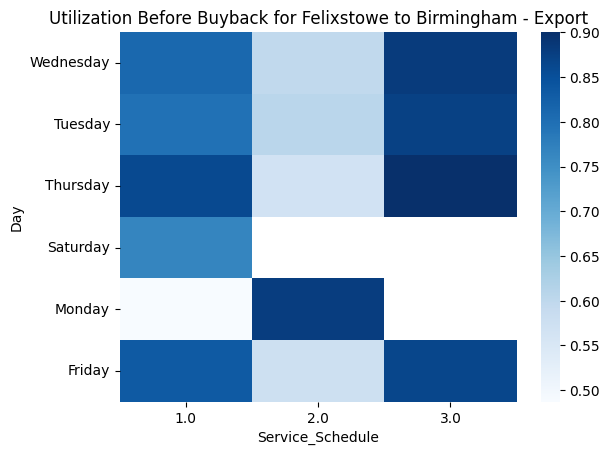

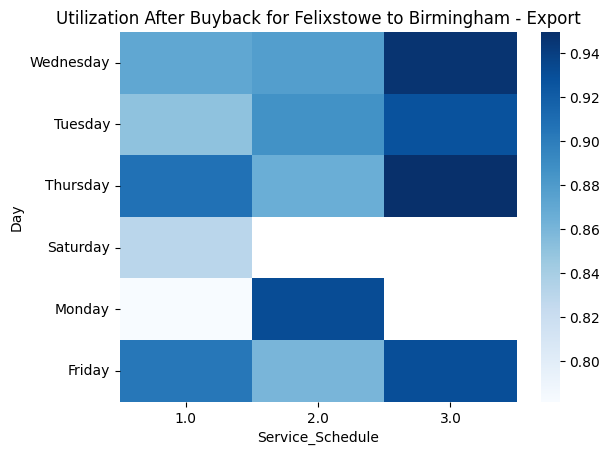

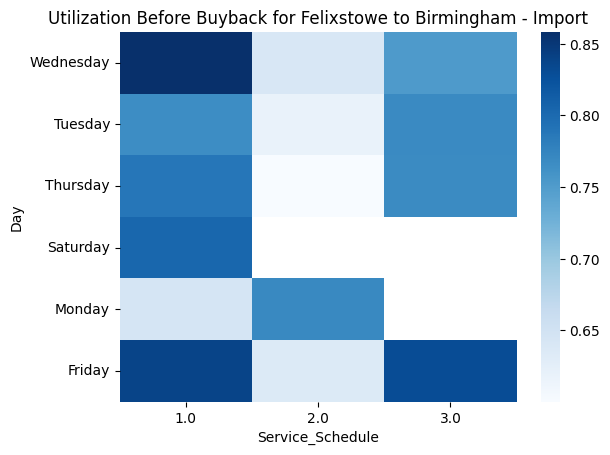

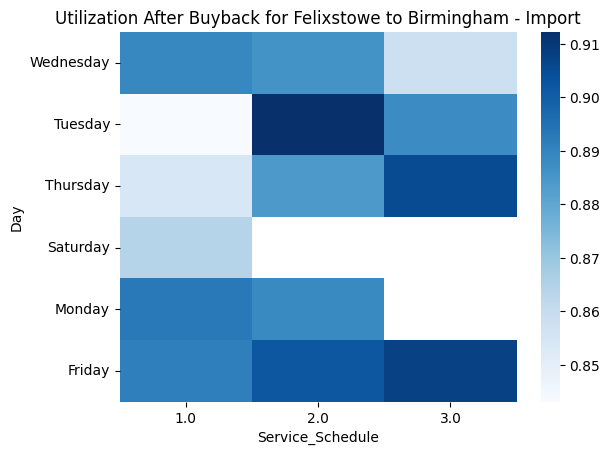

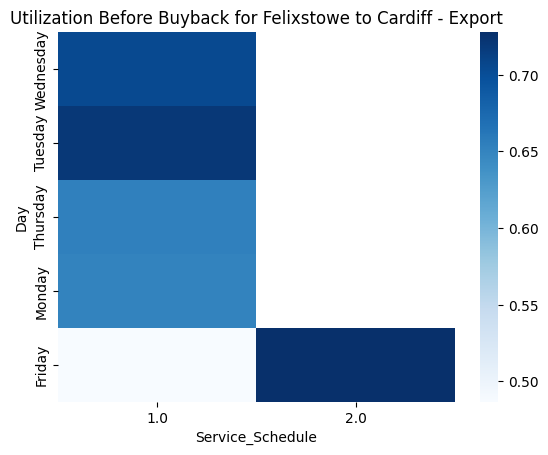

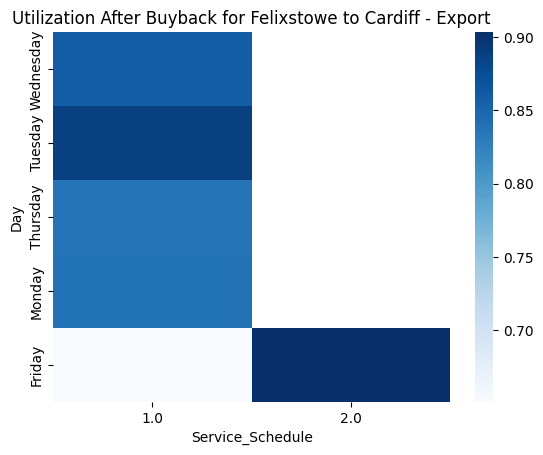

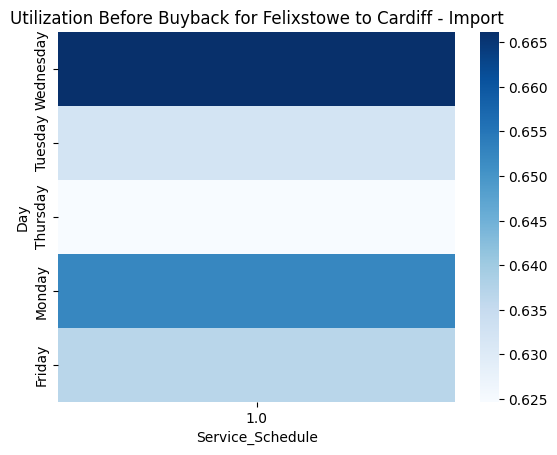

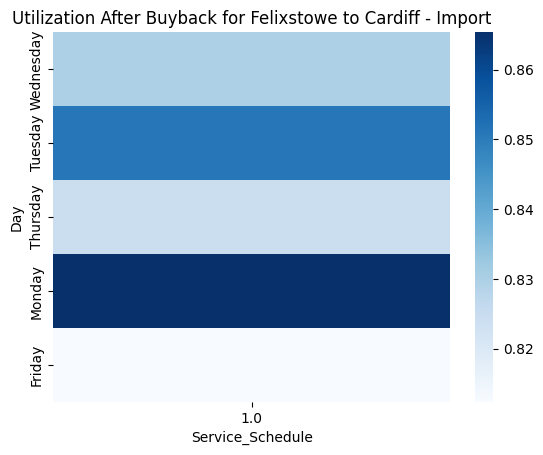

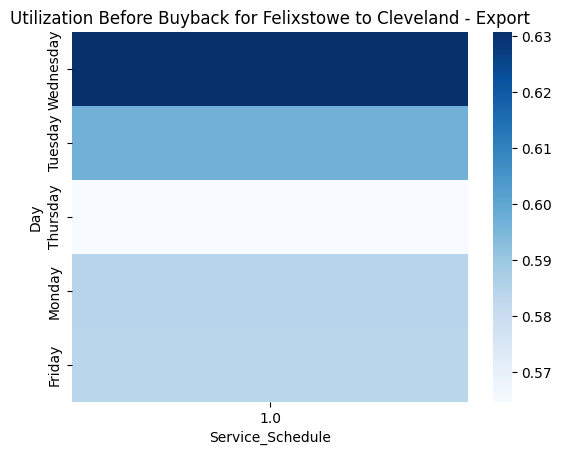

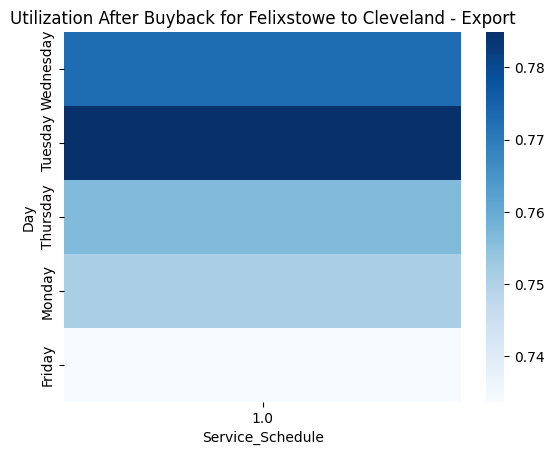

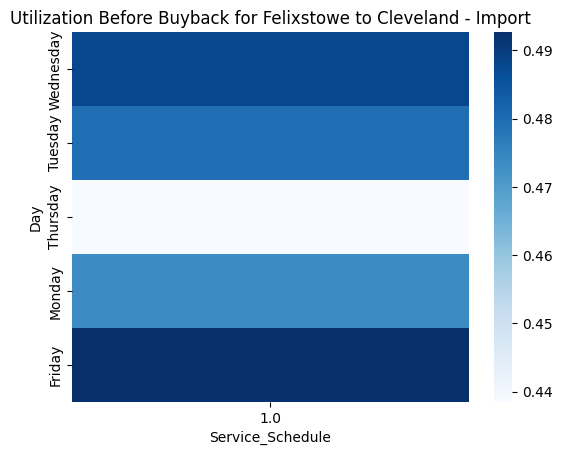

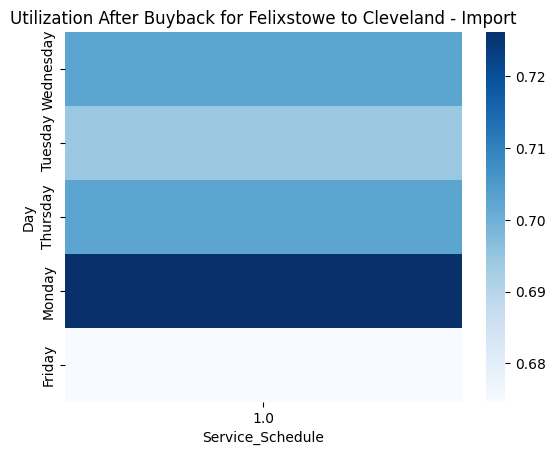

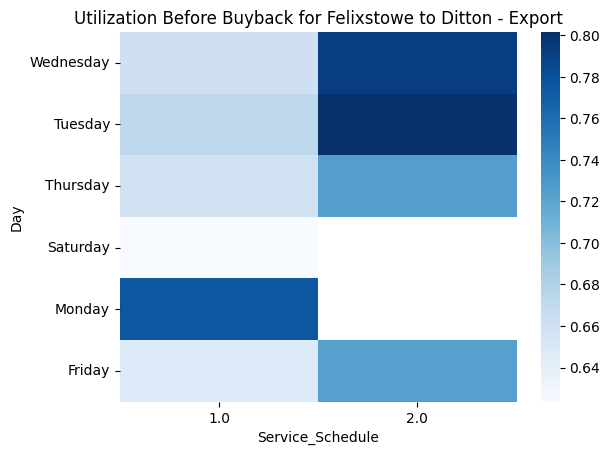

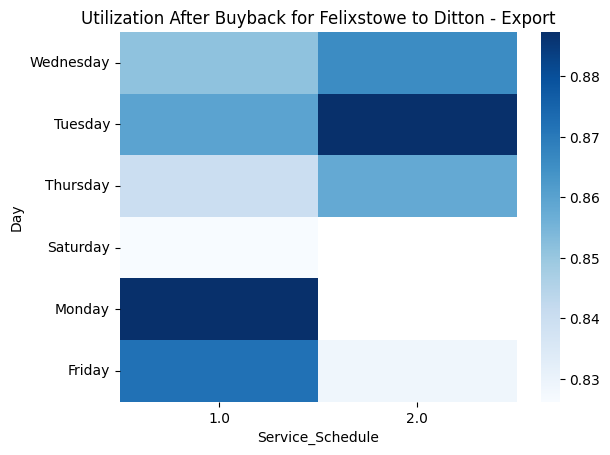

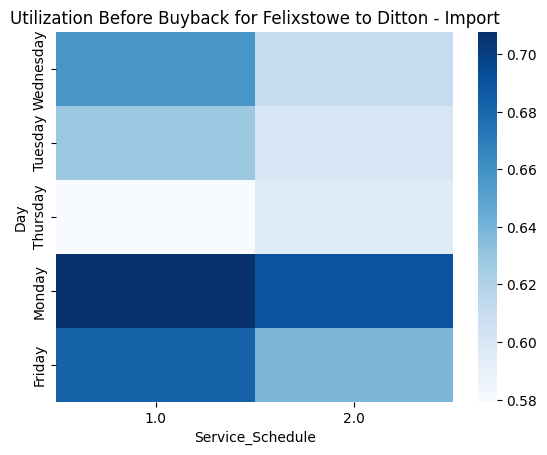

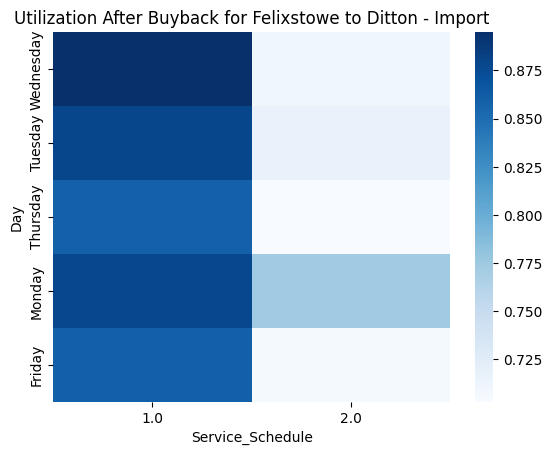

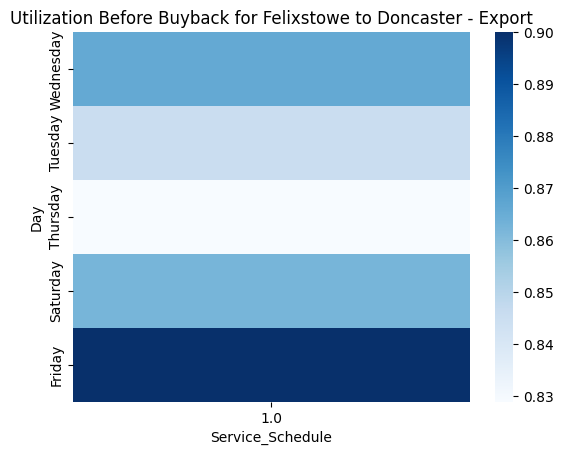

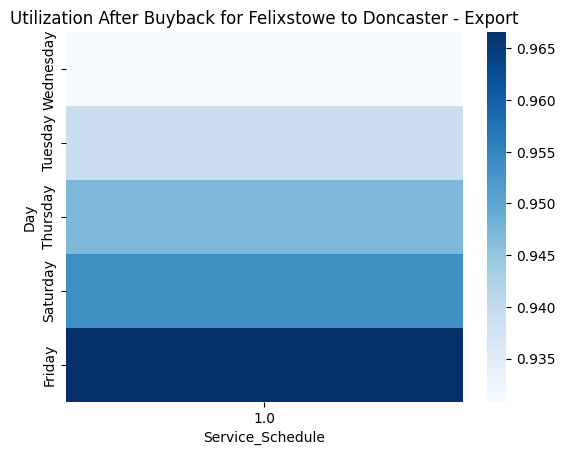

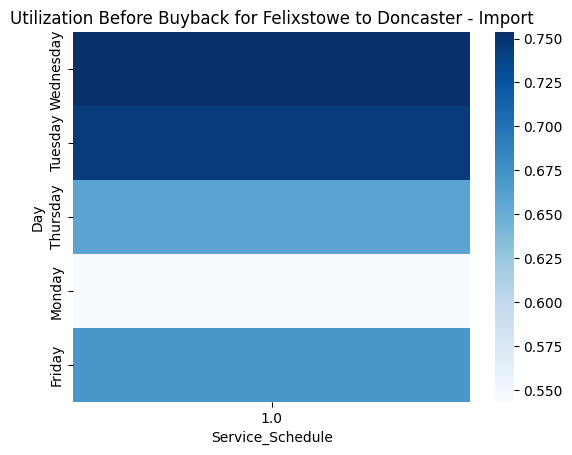

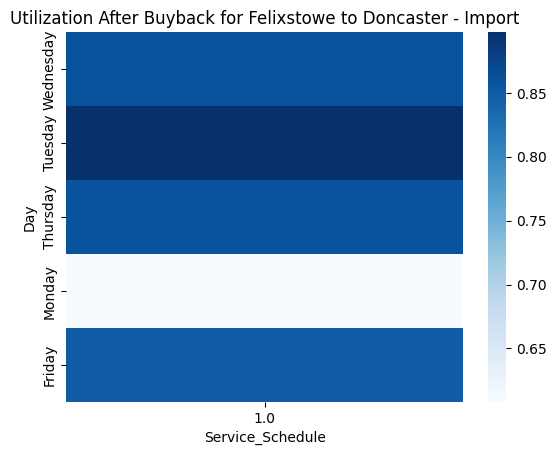

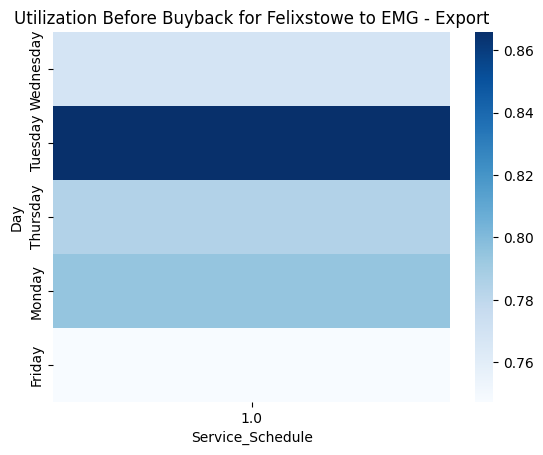

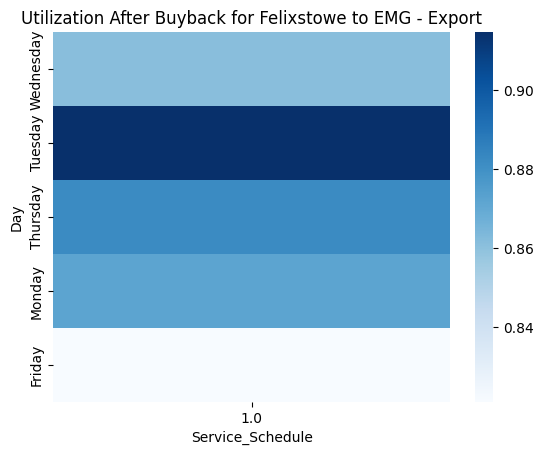

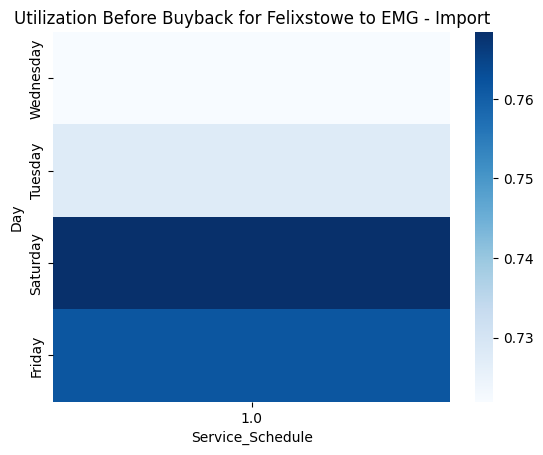

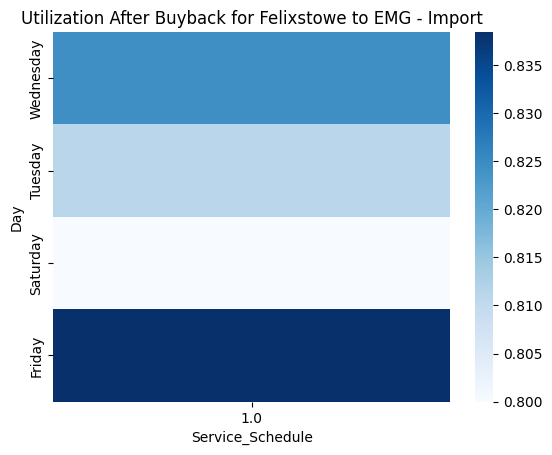

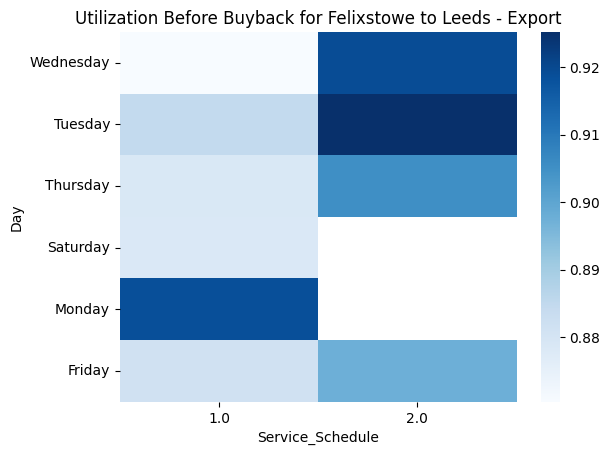

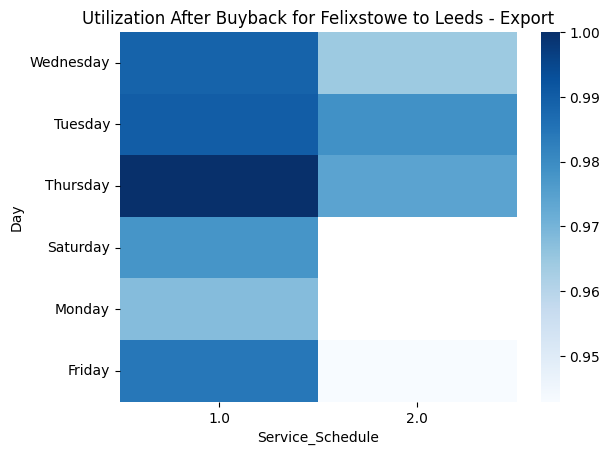

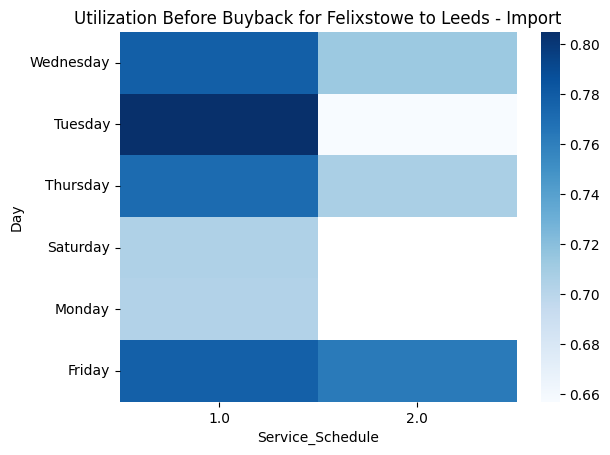

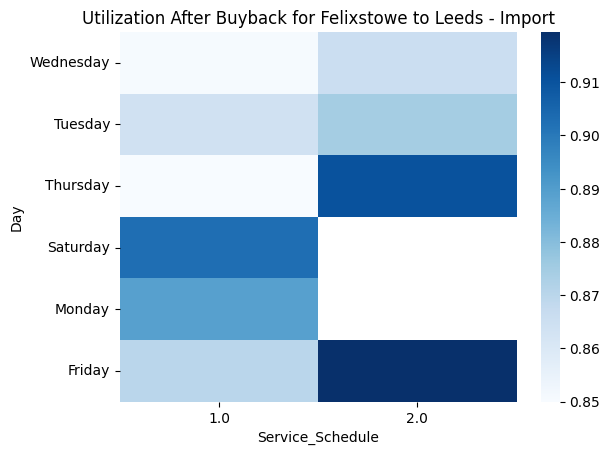

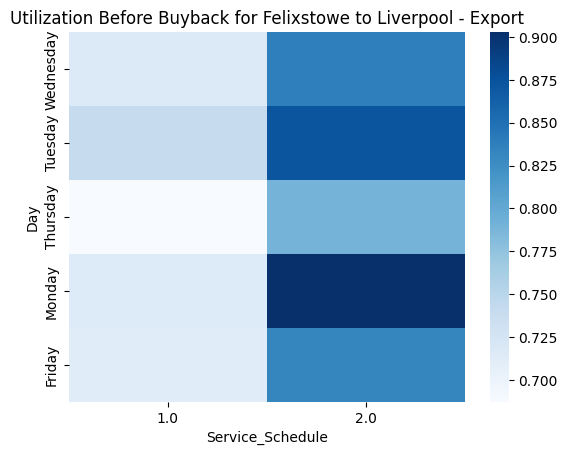

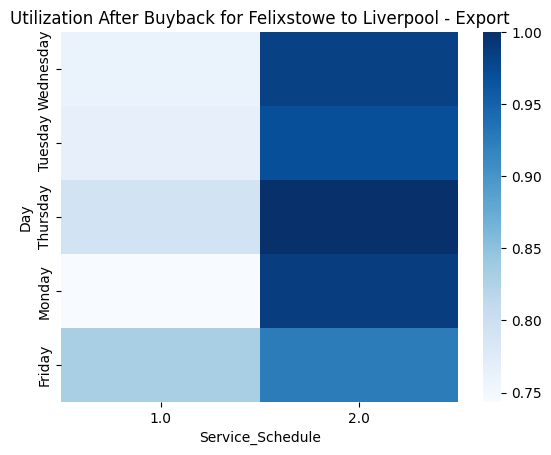

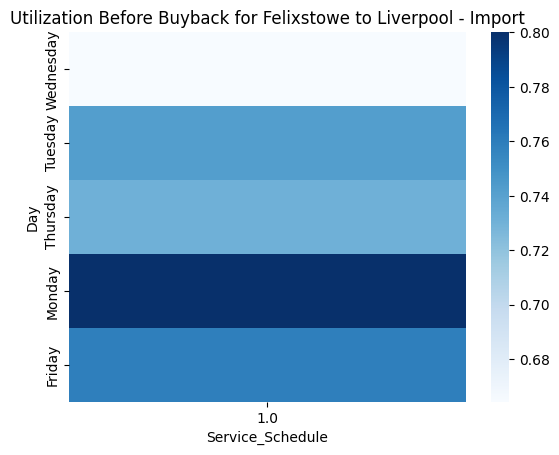

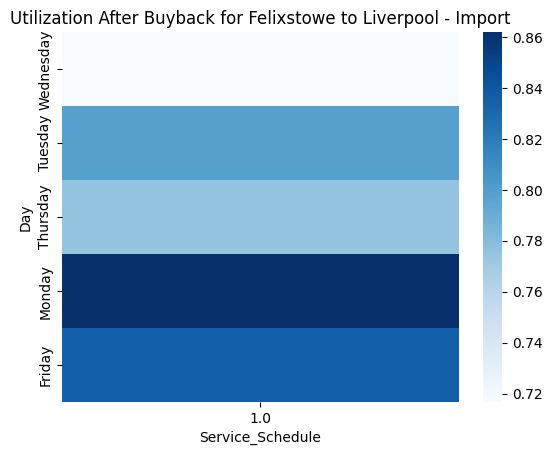

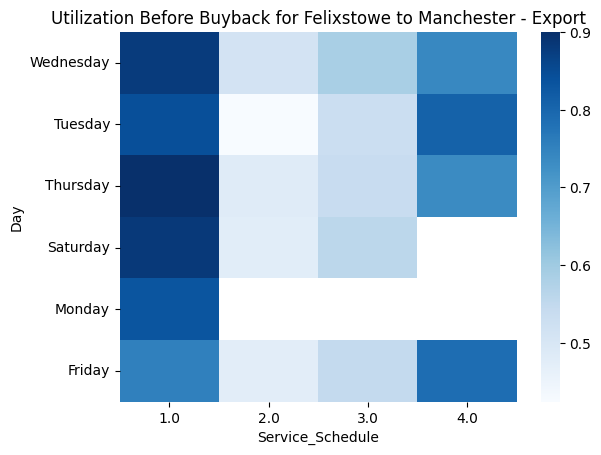

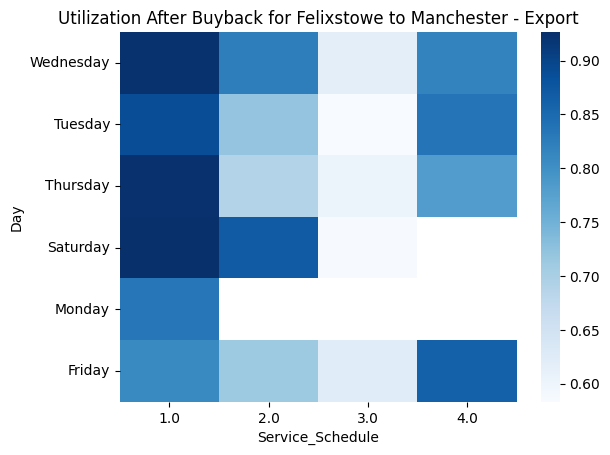

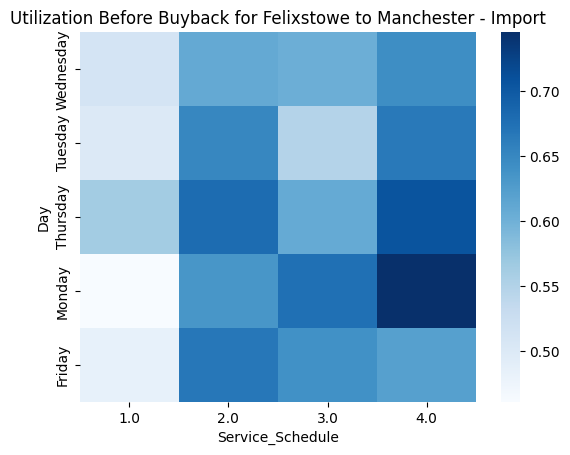

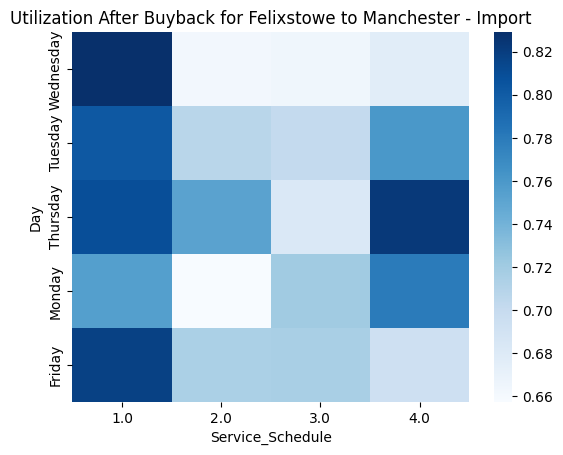

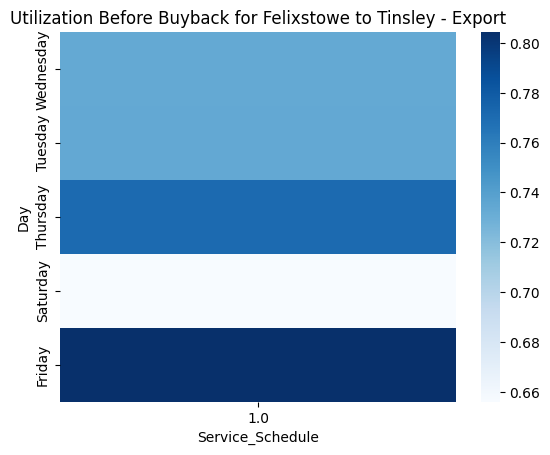

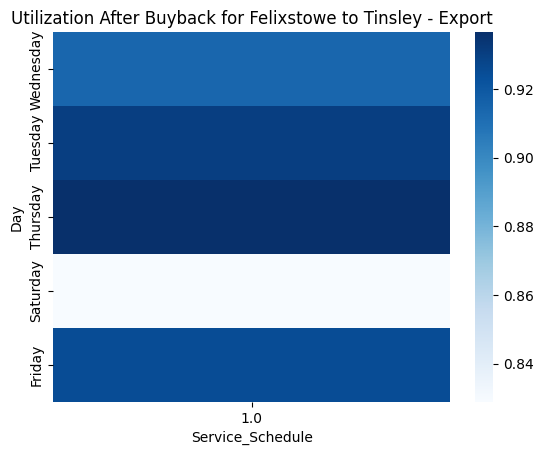

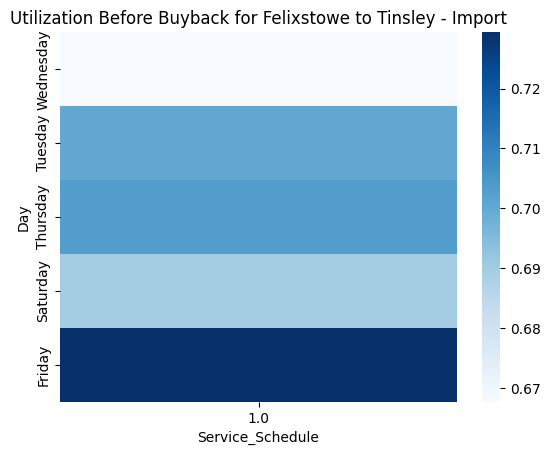

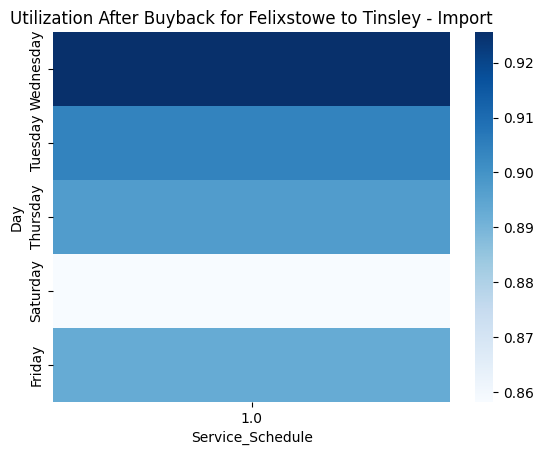

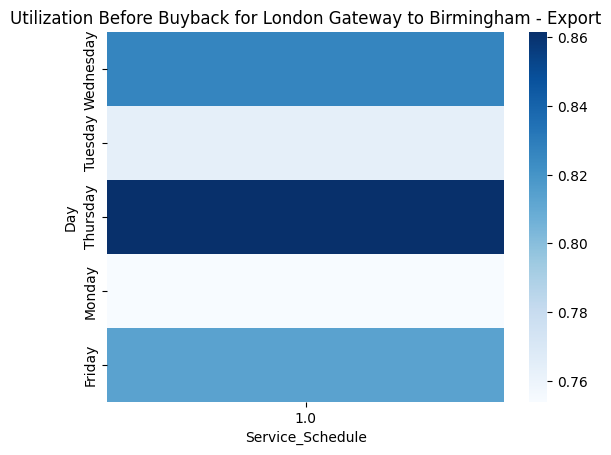

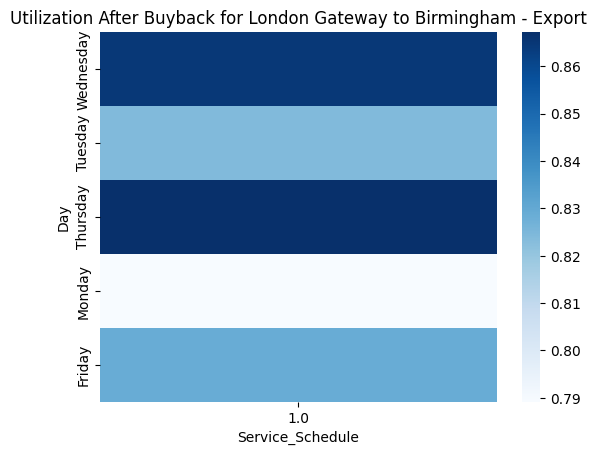

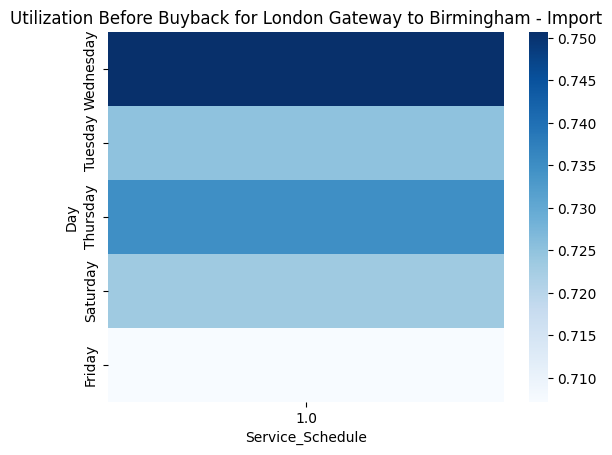

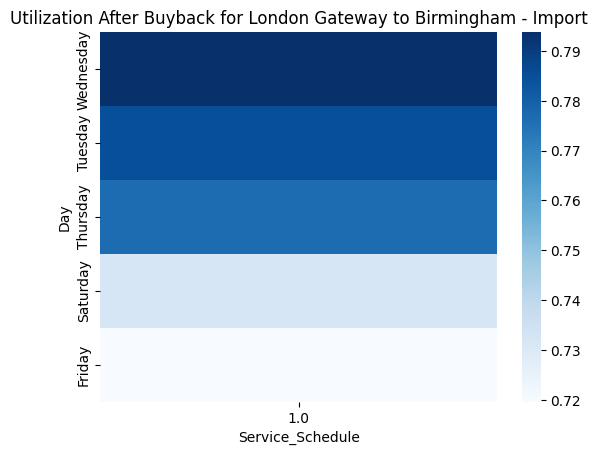

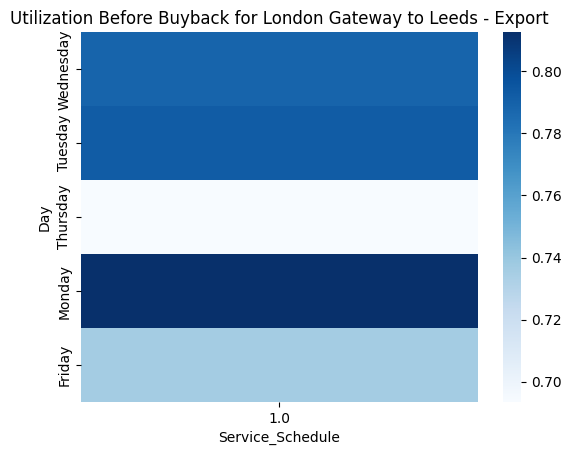

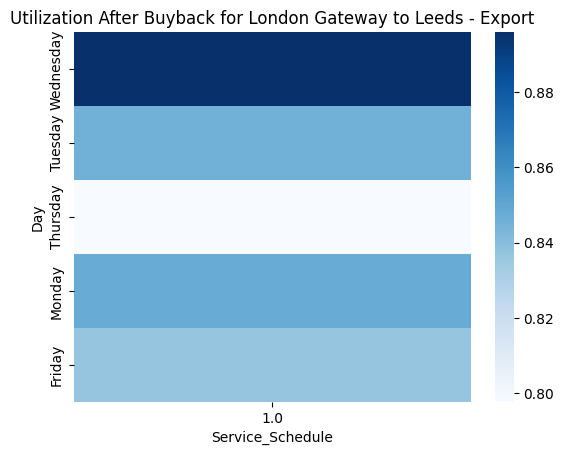

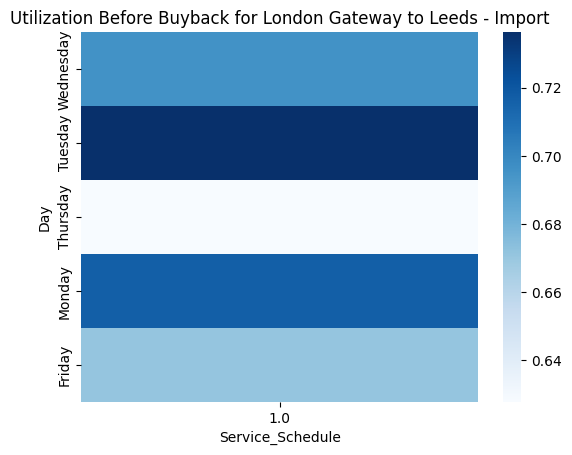

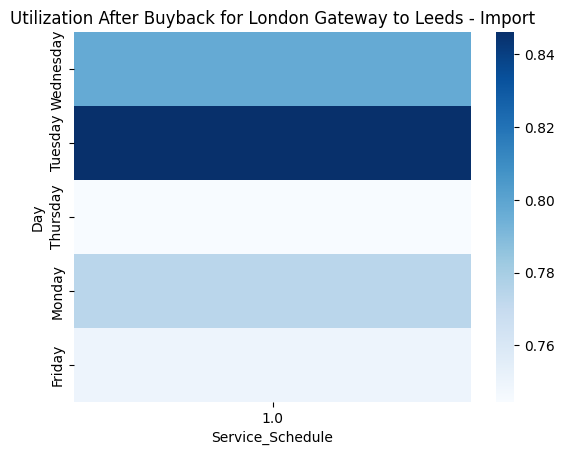

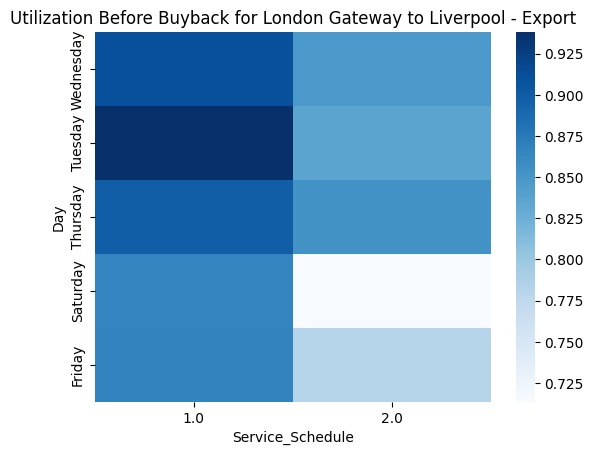

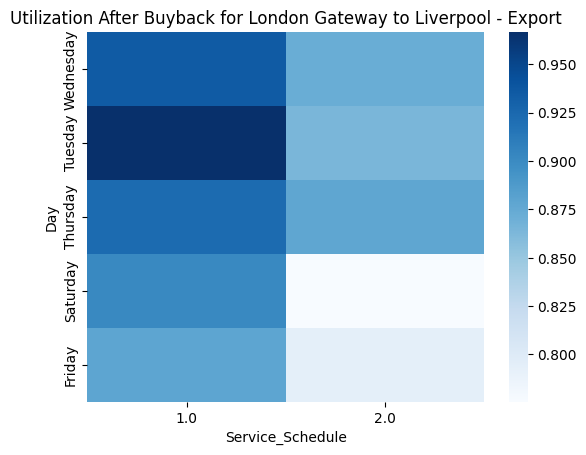

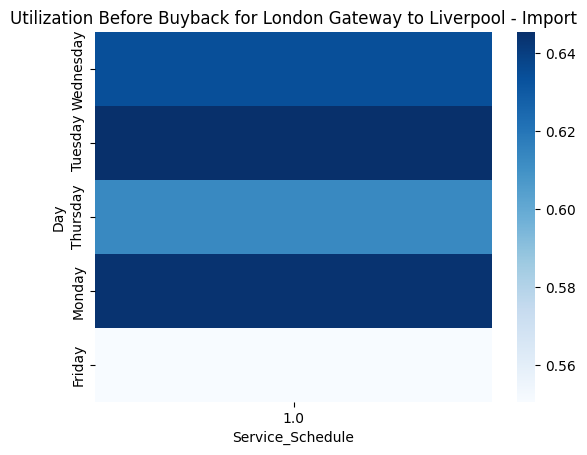

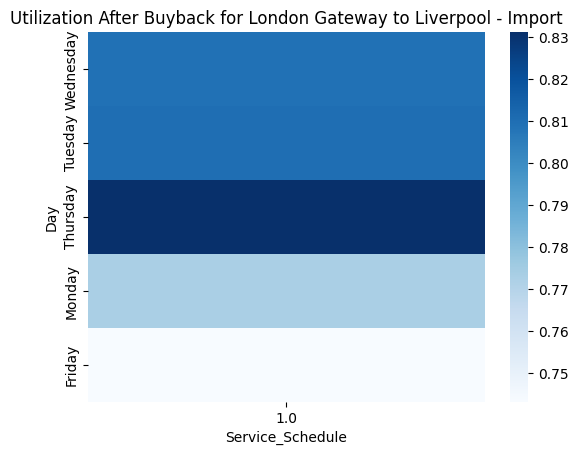

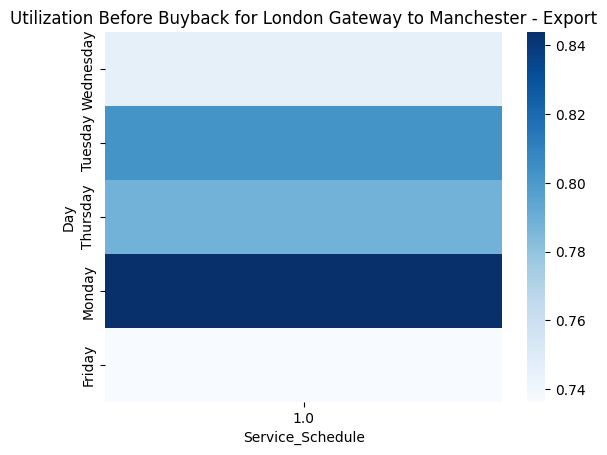

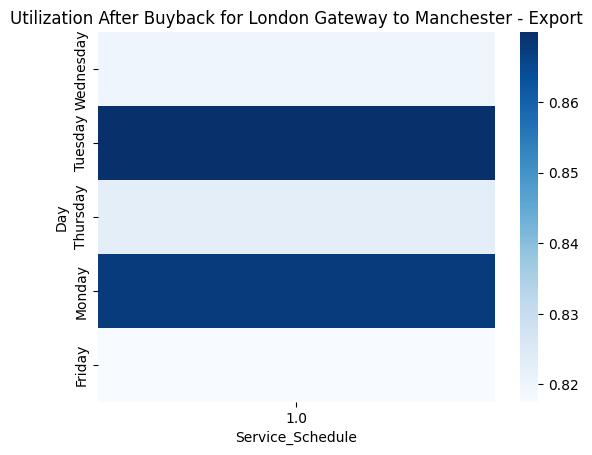

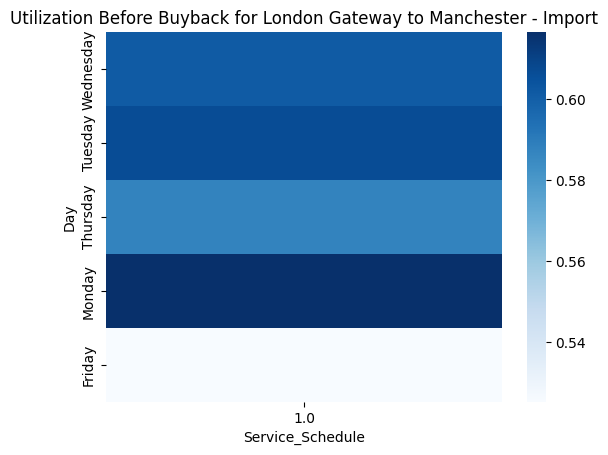

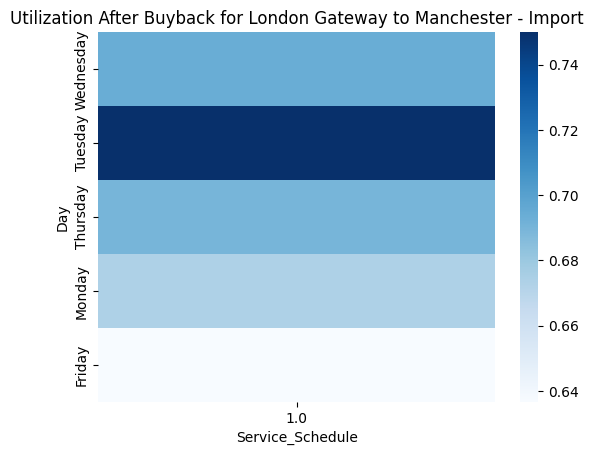

In [30]:
for p in port:
    for t in terminal:
        for i in direction:
            try:
                filter_viz= utilization[(utilization['Port'] == p) & (utilization['Terminal'] == t) \
                                                                  &  (utilization['Direction']== i)] 

                before_buyback= filter_viz[['Day', 'Service_Schedule', 'Utilization Before Buy Back']]
                after_buyback = filter_viz[['Day', 'Service_Schedule', 'Utilization After Buy Back']]

                table1 = before_buyback.pivot('Day', 'Service_Schedule', 'Utilization Before Buy Back')
                ax = sns.heatmap(table1, cmap="Blues")
                ax.invert_yaxis()
                ax.set_title('Utilization Before Buyback for ' + p + ' to ' + t + ' - ' + i)
                plt.show()

                table2 = after_buyback.pivot('Day', 'Service_Schedule', 'Utilization After Buy Back')
                ax = sns.heatmap(table2, cmap="Blues")
                ax.invert_yaxis()
                ax.set_title('Utilization After Buyback for ' + p + ' to ' + t + ' - ' + i)
                plt.show()
            except:
                pass
            

In [29]:
data= df.groupby(['Port', 'Terminal', 'Head Code', 'Week', 'Day', 'Direction']).agg({'Available TEU': 'mean', 'Used TEU': 'mean', \
                'Buy Back TEU': 'sum','Unused TEU': 'sum', 'Available 40ft': 'sum', 'Used 40 ft': 'sum', 'Buy Back - 40ft': 'sum', \
                'Unused 40 ft': 'sum', 'Available 20ft': 'sum', 'Used 20 ft': 'sum', 'Buy Back - 20ft': 'sum', \
                'Unused 20 ft': 'sum'}).reset_index()

In [33]:
data

,Port,Terminal,Head Code,Week,Day,Direction,Available TEU,Used TEU,Buy Back TEU,Unused TEU,Available 40ft,Used 40 ft,Buy Back - 40ft,Unused 40 ft,Available 20ft,Used 20 ft,Buy Back - 20ft,Unused 20 ft
156,Felixstowe,Birmingham,4L69,1,Friday,Export,22.5,20.5,0,4,20.0,20,0,0.0,5.0,1,0,4.0
157,Felixstowe,Birmingham,4L69,1,Saturday,Export,22.5,22.0,0,1,20.0,20,0,0.0,5.0,4,0,1.0
158,Felixstowe,Birmingham,4L69,1,Thursday,Export,22.5,20.5,0,4,20.0,20,0,0.0,5.0,1,0,4.0
159,Felixstowe,Birmingham,4L69,1,Wednesday,Export,22.5,21.0,0,3,20.0,20,0,0.0,5.0,2,0,3.0
160,Felixstowe,Birmingham,4L69,2,Friday,Export,22.5,22.5,0,0,20.0,18,0,2.0,5.0,9,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,Felixstowe,Birmingham,4L69,46,Friday,Export,21.5,20.5,0,2,20.0,20,0,0.0,3.0,1,0,2.0
345,Felixstowe,Birmingham,4L69,46,Saturday,Export,21.5,21.5,0,0,20.0,20,0,0.0,3.0,3,0,0.0
346,Felixstowe,Birmingham,4L69,46,Thursday,Export,21.5,20.5,0,2,20.0,20,0,0.0,3.0,1,0,2.0
347,Felixstowe,Birmingham,4L69,46,Tuesday,Export,21.5,21.5,0,0,20.0,20,0,0.0,3.0,3,0,0.0
